# Pandas Demo

In [2]:
import requests

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
import seaborn as sns
sns.set_context('talk')

## Pandas

**{Pan}el {Da}ta Analysis**

* Python & Numpy
* Performant (cython)
* IT Quant / Orienté Finance (initialement)

* Fonctionnalités

  * données en 1D, 2D et 3D
  * lecture/écriture sur CSV, Excel, base de données, hdf5, json, ...
  * group-by, merge, join
  * séries temporelles & valeurs manquantes

* `DataFame`
  * tableau 2D : matrice, table SQL, fichier CSV, feuille Excel
  * un type de données par colonne : entier, double, chaîne de caractères, date, ...

**Plan / Points abordés**

* lecture de données
* type de données
* sélection de données
* indicateurs statistiques
* appliquer une fonction à une/des colonne(s)
* groupby
* tracer quelques figures
* enchaîner des appels de fonction
* séries temporelles

**Note** : les données viennent de https://archive.ics.uci.edu/ml/index.html (Machine Learning Repository)

## Contraceptive Methods

**Data Set Information**:

   > This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

* https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
* http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data

In [1]:
# Comma Separated Values
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"

In [5]:
cmc_names = ['age', 'education', 'husband_education', 'children', 'religion', 'working',
             'husband_occupation', 'living_index', 'media', 'method']

On peut lire un fichier CSV depuis un fichier **mais aussi depuis une URL**

In [6]:
df = pd.read_csv(url, names=cmc_names, header=None)

Cinq premières lignes du fichier.

In [7]:
df.head()

,age,education,husband_education,children,religion,working,husband_occupation,living_index,media,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


```
Attribute Information:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term
```

Je veux juste une colonne

In [8]:
df["age"].head()

0    24
1    45
2    43
3    42
4    36
Name: age, dtype: int64

Je veux sélectionner plusieurs colonnes

In [9]:
df[['education', 'children']].head()

,education,children
0,2,3
1,1,10
2,2,7
3,3,9
4,3,8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
age                   1473 non-null int64
education             1473 non-null int64
husband_education     1473 non-null int64
children              1473 non-null int64
religion              1473 non-null int64
working               1473 non-null int64
husband_occupation    1473 non-null int64
living_index          1473 non-null int64
media                 1473 non-null int64
method                1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


In [11]:
df.describe()

,age,education,husband_education,children,religion,working,husband_occupation,living_index,media,method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


**Combien de valeurs uniques par colonne ?**

In [12]:
df.apply(lambda x: x.nunique())

age                   34
education              4
husband_education      4
children              15
religion               2
working                2
husband_occupation     4
living_index           4
media                  2
method                 3
dtype: int64

**L'âge et le nombre d'enfants par méthode contraceptive**

Présentation du `group-by`.

In [13]:
df.groupby('method')[['age', 'children']].mean()

,age,children
method,,
1,33.424483,2.934817
2,34.384384,3.738739
3,30.244618,3.352250


**Corrélation** entre les données

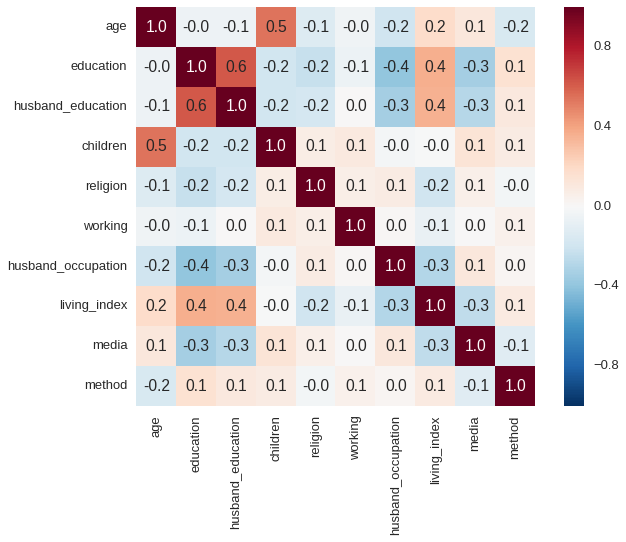

In [14]:
sns.heatmap(df.corr(), square=True, annot=True, fmt=".1f")

Un peu de **prédiction** ??

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

On prend d'un côté les *features* et de l'autre la valeur à prédire (i.e. `method`)

In [16]:
X = df.drop('method', axis=1).values

In [17]:
y = df['method'].values

In [18]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=6)

In [19]:
logit = LogisticRegression()

In [20]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
logit.predict(X_test)

array([1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 3, 2, 3, 1, 2, 1, 3, 3, 1, 2, 1, 3, 3,
       1, 1, 1, 1, 3, 1, 2, 3, 2, 1, 1, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3,
       1, 2, 1, 1, 1, 3, 2, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 2, 1, 1,
       3, 1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 3, 1, 1,
       3, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 2, 3, 3, 2, 1, 3, 3, 3, 1, 1, 1,
       3, 2, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 2, 2, 1, 2, 3, 3, 2, 2,
       1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 3, 2, 1,
       2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3,
       1, 3, 2, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 2, 3,
       2, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 2,
       2, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 3, 3,
       3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 3, 2, 2, 1, 3, 1, 1, 1, 3,
       1, 1,

In [22]:
logit.score(X_test, y_test)

0.50677506775067749

column no. 1, 2 ,6, 7 are categorical

* education
* husband's education
* husband's occupation
* standard-of-living

try to turn them into categorical data (i.e. more than 2 columns with 0 or 1)

In [91]:
df_2 = df.drop(['education', 'husband_education', 'husband_occupation', 'living_index'], axis=1)
df_2 = pd.concat([df_2, pd.get_dummies(df['education'], prefix='educ', drop_first=True),
                 pd.get_dummies(df['husband_education'], prefix='h_educ', drop_first=True),
                 pd.get_dummies(df['husband_occupation'], prefix='h_occ', drop_first=True),
                 pd.get_dummies(df['living_index'], prefix='l_idx', drop_first=True)], axis=1)

In [92]:
df_2.head()

,age,children,religion,working,media,method,educ_2,educ_3,educ_4,h_educ_2,h_educ_3,h_educ_4,h_occ_2,h_occ_3,h_occ_4,l_idx_2,l_idx_3,l_idx_4
0,24,3,1,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,45,10,1,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,7,1,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,42,9,1,1,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,8,1,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [93]:
X_2 = df_2.drop('method', axis=1).values

In [94]:
y_2 = df_2['method'].values

In [95]:
X2_train, X2_test, y2_train, y2_test = cross_validation.train_test_split(X_2, y_2, random_state=6)

In [96]:
logit.fit(X2_train, y2_train)
logit.score(X2_test, y2_test)

0.48509485094850946

## Flow People Count

**Data Set Information**:

   > Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

   > The purpose is to predict the presence of an event such as a conference in the building that is reflected by unusually high people counts for that day/time period. 

**Idées**

* changer le 7 et 9 en in & out
* bien convertir les dates & time en datetime
* les mettre en index
* tracer les courbes entrant, sortant
* faire du sample
* faire du rolling
* faire de l'interpolation ?

In [23]:
flow_names = ["flow_id", "date", "time", "count"]

In [24]:
flow = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data",
                  names=flow_names, header=0)

In [25]:
flow.head()

,flow_id,date,time,count
0,9,07/24/05,00:00:00,0
1,7,07/24/05,00:30:00,1
2,9,07/24/05,00:30:00,0
3,7,07/24/05,01:00:00,0
4,9,07/24/05,01:00:00,0


In [26]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 0 to 10078
Data columns (total 4 columns):
flow_id    10079 non-null int64
date       10079 non-null object
time       10079 non-null object
count      10079 non-null int64
dtypes: int64(2), object(2)
memory usage: 315.0+ KB


On va travailler un peu la donnée :

* `flow_id` : 7 pour une personne qui sort, 9 pour entre
* deux colonnes date & timestamp : ne faire qu'une date

### Flow ID

In [29]:
flow['out'] = flow['flow_id'].apply(lambda x: x == 7)

In [30]:
flow.head()

,flow_id,date,time,count,out
0,9,07/24/05,00:00:00,0,False
1,7,07/24/05,00:30:00,1,True
2,9,07/24/05,00:30:00,0,False
3,7,07/24/05,01:00:00,0,True
4,9,07/24/05,01:00:00,0,False


### Date & Timestamp

* Qu'est-ce que sont les colonnes `date` et `time` ?
* Comment convertir en "vrai" date ?

In [36]:
flow.iloc[0].date, flow.iloc[0].time

('07/24/05', '00:00:00')

In [37]:
d, t = flow.iloc[0].date, flow.iloc[0].time
d + "T" + t

'07/24/05T00:00:00'

In [38]:
pd.Timestamp(_34)

Timestamp('2005-07-24 00:00:00')

On tente d'appliquer une fonction qui retourne un `Timestamp` pour l'affecter à une colonne.

In [48]:
flow['dt'] = flow.apply(lambda x: pd.Timestamp(x.date + 'T' + x.time), axis=1)

In [49]:
flow.head()

,flow_id,date,time,count,out,dt
0,9,07/24/05,00:00:00,0,False,2005-07-24 00:00:00
1,7,07/24/05,00:30:00,1,True,2005-07-24 00:30:00
2,9,07/24/05,00:30:00,0,False,2005-07-24 00:30:00
3,7,07/24/05,01:00:00,0,True,2005-07-24 01:00:00
4,9,07/24/05,01:00:00,0,False,2005-07-24 01:00:00


On veut potentiellement se débarrasser de colonnes `flow_id`, `date` et `time`. Et aussi passer la colonne de "vraies" dates en `Index`.

In [51]:
flow.drop(['flow_id', 'date', 'time'], axis=1).set_index('dt').head()

,count,out
dt,,
2005-07-24 00:00:00,0,False
2005-07-24 00:30:00,1,True
2005-07-24 00:30:00,0,False
2005-07-24 01:00:00,0,True
2005-07-24 01:00:00,0,False


In [55]:
dflow = flow.drop(['flow_id', 'date', 'time'], axis=1).set_index('dt')

In [81]:
dflow.head()

,count,out
dt,,
2005-07-24 00:00:00,0,False
2005-07-24 00:30:00,1,True
2005-07-24 00:30:00,0,False
2005-07-24 01:00:00,0,True
2005-07-24 01:00:00,0,False


In [82]:
dflow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10079 entries, 2005-07-24 00:00:00 to 2005-11-05 23:30:00
Data columns (total 2 columns):
count    10079 non-null int64
out      10079 non-null bool
dtypes: bool(1), int64(1)
memory usage: 167.3 KB


### Analyse

Un peu de stats :

* combien de gens qui sortent / qui entrent
* moyenne des gens qui sortent / entrent

In [62]:
dflow.groupby('out')['count'].mean()

out
False    3.888294
True     3.738242
Name: count, dtype: float64

In [63]:
dflow.groupby('out')['count'].count()

out
False    5040
True     5039
Name: count, dtype: int64

Et si on veut appliquer plusieurs fonctions d'aggrégation sur nos groupes : `agg`.

In [61]:
dflow.groupby('out')['count'].agg(['mean', 'sum', 'std'])

,mean,sum,std
out,,,
False,3.888294,19597,6.834565
True,3.738242,18837,6.010738


Et si on voulait regarder la somme où la moyenne par jour ?

...

ou toutes les 4 heures ?

In [74]:
day_out = dflow.query('out').resample('1D').mean()['count']
day_in = dflow.query('not out').resample('1D').mean()['count']

In [75]:
day_in.head()

dt
2005-07-24    0.333333
2005-07-25    3.666667
2005-07-26    4.520833
2005-07-27    5.145833
2005-07-28    5.645833
Freq: D, Name: count, dtype: float64

In [77]:
day = pd.DataFrame({"in": day_in,
                   "out": day_out})
day.head()

,in,out
dt,,
2005-07-24,0.333333,0.531915
2005-07-25,3.666667,3.375000
2005-07-26,4.520833,4.583333
2005-07-27,5.145833,4.791667
2005-07-28,5.645833,5.083333


Et toutes les 4 heures du coup ?

In [83]:
dflow.query('out').resample('4H').mean().head(10)

,count,out
dt,,
2005-07-24 00:00:00,0.428571,True
2005-07-24 04:00:00,0.250000,True
2005-07-24 08:00:00,0.250000,True
2005-07-24 12:00:00,0.000000,True
2005-07-24 16:00:00,1.375000,True
2005-07-24 20:00:00,0.875000,True
2005-07-25 00:00:00,0.125000,True
2005-07-25 04:00:00,0.750000,True
2005-07-25 08:00:00,3.625000,True


Et si on veut, on peut sommer, où calculer l'écart-type pour ces tranches de temps : 1 journée, 4 heures, ou même pourquoi pas toutes les semaines du mercredi au mardi.

In [91]:
dflow.query("not out").resample('W-WED').sum()['count']

dt
2005-07-27     656
2005-08-03    1162
2005-08-10    1233
2005-08-17    1117
2005-08-24    1352
2005-08-31    1245
2005-09-07    1007
2005-09-14    1153
2005-09-21    1235
2005-09-28    1321
2005-10-05    1592
2005-10-12    1315
2005-10-19    1353
2005-10-26    1544
2005-11-02    1684
2005-11-09     628
Freq: W-WED, Name: count, dtype: int64

### Quelques courbes

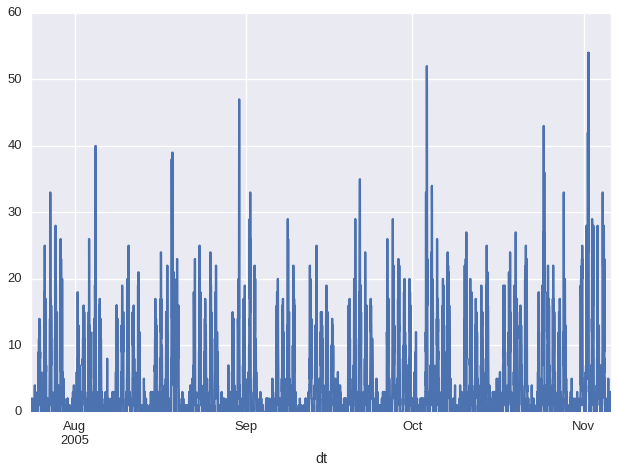

In [94]:
dflow.query('out')['count'].plot()

On peut vouloir **lisser** les courbes à forte variabilité : `rolling`. On calcule la moyenne glissante sur les K dernières valeurs.

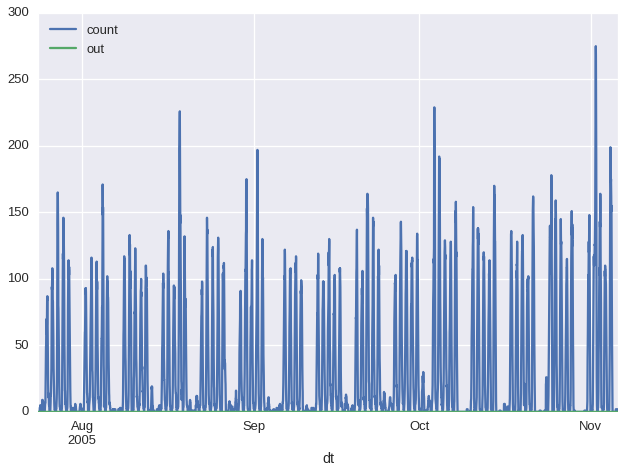

In [101]:
dflow.query('not out').rolling(8).sum().plot()

In [92]:
day.head()

,in,out
dt,,
2005-07-24,0.333333,0.531915
2005-07-25,3.666667,3.375000
2005-07-26,4.520833,4.583333
2005-07-27,5.145833,4.791667
2005-07-28,5.645833,5.083333


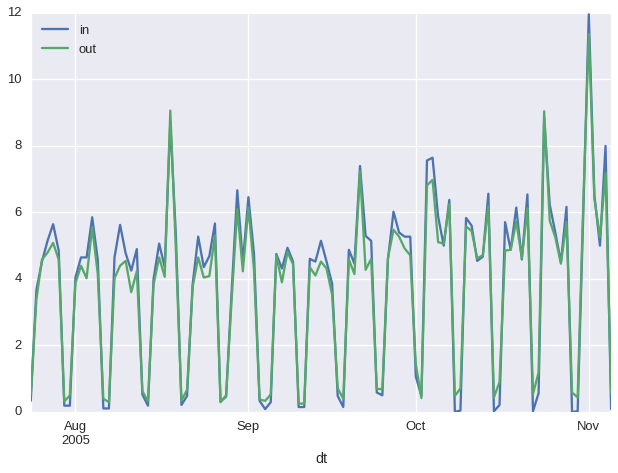

In [93]:
day.plot()


## Bordeaux Open Data

**Idées** :

* tracer les points sur une carte (on sort un peu de pandas)
* y'a des points & des polygones : faire du geopandas ?

In [20]:
# aire de jeux
url_playground = "https://bdxconfigogdi.blob.core.windows.net/converteddata/databordeaux/airejeux.csv"
local_playground = "data/airejeux.csv"

In [22]:
playground = pd.read_csv(url_playground, sep=";")

In [23]:
# parcs, squares, jardins
url_park = "https://bdxconfigogdi.blob.core.windows.net/converteddata/databordeaux/parcjardin.csv"
local_park = "data/parcjardin.csv"

In [24]:
park = pd.read_csv(url_park, sep=";")

In [25]:
playground.head()

,CLE,NATURE,NOM,AGE_MIN,AGE_MAX,NOMBRE_JEUX,X_LONG,Y_LAT,GEOMETRIE,NUM_QUARTIER
0,976,Aire de jeux,Berges du Lac_Plage,"1,00","12,00",2,"-0,578932285046847","44,8779825499956","POLYGON ((-0.578842032917968 44.8779719925657,...",NaN
1,978,Aire de jeux,Place des Droits de l'Enfant,"1,00","12,00",11,"-0,564294382315667","44,845843033572","POLYGON ((-0.564636852525033 44.8461322949604,...",7.0
2,984,Aire de jeux,Place Valmy,"3,00","12,00",3,"-0,594928469747018","44,8228503127685","POLYGON ((-0.594941529427182 44.8227543692787,...",4.0
3,45881,Aire de jeux,Place Francis de Pressensé,"2,00","6,00",4,"-0,575308846560817","44,8323190884165","POLYGON ((-0.575379333336975 44.8322868400781,...",6.0
4,40898,Aire de jeux,Parc de la Cité du Grand Parc_Maryse Bastié,"1,00","8,00",4,"-0,578084705837757","44,8613135443103","POLYGON ((-0.578157510681416 44.8613037216689,...",2.0


In [26]:
park.head()

,CLE,NOM_ESPACE_ENTRETIEN,LABEL,TYPE_DE_GESTION_DIFFERENCIEE,TYPOLOGIE_PATRIMOINE,UTILISATION,X_LONG,Y_LAT,GEOMETRIE
0,1336,Parc de la Béchade,Ecojardin - Refuge LPO,Classe 2 : Priorité aux usages récréatifs,"Parc, jardin et square",NaN,"-0,59848036133239","44,8264628940148","POLYGON ((-0.598700443555036 44.8259224568624,..."
1,1115,Parc aux Angéliques séquence 1,NaN,Classe 2 : Priorité aux usages récréatifs,"Parc, jardin et square",NaN,"-0,56363500914887","44,8490860371795","POLYGON ((-0.562434498293604 44.8492913637927,..."
2,1119,Jardin de la Mairie,NaN,Classe 2 : Priorité aux usages récréatifs,"Parc, jardin et square",NaN,"-0,5804615766991","44,8378156427562","POLYGON ((-0.581297929251778 44.8379848693621,..."
3,1117,Parc Chantecrit,NaN,Classe 2 : Priorité aux usages récréatifs,"Parc, jardin et square","Promenade, jeux d'enfants, aire multisports","-0,56352782729974","44,8634384524561","POLYGON ((-0.564028129633717 44.8629767229793,..."
4,1161,Parc des Berges de Garonne,Ecojardin - Refuge LPO,Classe 3 : Priorité à la biodiversité,"Parc, jardin et square",Promenade,"-0,53980293808487","44,8856333789349","POLYGON ((-0.54058132877659 44.8893531139258, ..."


**JSON ??**

In [30]:
json_playground = 'http://odata.bordeaux.fr/v1/databordeaux/airejeux/?format=json'

In [ ]:
requests.get(json_playground).json()

In [ ]:
pd.read_json(json_playground, orient='index')